## Data620 - FINAL PROJECT 

**Group Memebers : Vijaya Cherukuri, Abdellah Ait Elmouden, Priya Shaji, Habib Khan**

### Introduction

Social  networks  are  the  main  resources  to  gather information   about   people’s   opinion   and   sentiments   towards different  topics  as  they  spend  hours  daily  on social  media and share   their   opinion. In   this   project   we   show   the application of sentimental analysis and how to connect to Twitter and  run  sentiment analysis  queries, based on News Topics during COVID-19.

### Motivation

Six months since the first COVID-19 case in the United States, and 113+ days into the earliest Lockdown Order of New York City, now the city reopen the time some other states see coronavirus cases rise. how have people been feeling through this special time? Do we know how others are responding to the pandemic? The Corona Virus endangers our physical health indeed, but alongside, social distancing also poses a threat to our emotional stability. Thus, it is crucial to understand public sentiments under COVID-19. To analyze these we'll use Sentiment Analysis on tweets to aid the understanding of sentiment trends.

As of now Covid-19 is one of the top trending topics. Presently it stands in 7th position in the twitter hot topics.

![alt text](Twittertrend.png)

### Data Source

We will be using the Twitter API, as our tool to collect data for this analysis. Twitter is a gold mine of data. Unlike other social platforms, almost every user’s tweets are completely public and pullable. This is a huge plus if you’re trying to get a large amount of data to run analytics on.

![alt text](twitter.png)

In [1]:
#import nltk
#nltk.download('vader_lexicon')
#pip install tweepy
#pip install textblob

#from nltk.corpus import stopwords
#from nltk.stem.wordnet import WordNetLemmatizer
#from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
#import nltk
#nltk.download('wordnet')

import pandas as pd
import re
import textblob
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 
import nltk
import tweepy
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
#nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()
import warnings
warnings.filterwarnings('ignore')

In [2]:
consumer_key='lub2vXiqJXY5JVYTtxaQWvshE'
consumer_secret='o4tRCRf1YWo1WdrQzx1xNhuSvOIshguPZNx86U9UVCaNzsLPEF'
access_token='165276006-rCCM1Nt4txkpxMa01RJLUuq7WrF9sREqxHFApiUm'
access_token_secret='lf2SmfrfrIBd2aiYmq24oPfXVlZSLBamJDEMjM5eHtvkE'

In [3]:
auth =  tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)
public_tweets = api.search('Covid_19')

In [4]:
##-------- I edited below this line----------
search_term = "#Covid -filter:retweets"

tweets = tweepy.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2020-03-25').items(1000)

In [5]:
#convert twitter data into a dataframe

json_data = [r._json for r in tweets]
df = pd.io.json.json_normalize(json_data)


In [6]:
df.head()

,created_at,id,id_str,text,truncated,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,...,quoted_status.place.full_name,quoted_status.place.country_code,quoted_status.place.country,quoted_status.place.contained_within,quoted_status.place.bounding_box.type,quoted_status.place.bounding_box.coordinates,geo.type,geo.coordinates,coordinates.type,coordinates.coordinates
0,Thu Jul 16 00:17:26 +0000 2020,1283556312421408770,1283556312421408770,She's gonna need a bigger mask. #Walmart #COVI...,False,"<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Thu Jul 16 00:17:06 +0000 2020,1283556228086607877,1283556228086607877,@foxnation @kilmeade Great work covering for @...,True,"<a href=""http://twitter.com/download/iphone"" r...",1.283489e+18,1283489259614158848,3.776442e+07,37764422,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Thu Jul 16 00:16:59 +0000 2020,1283556196792905728,1283556196792905728,". In an interview with CNBC, Gates says that f...",True,"<a href=""https://mobile.twitter.com"" rel=""nofo...",1.283556e+18,1283555894916198400,2.478785e+08,247878466,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Thu Jul 16 00:16:56 +0000 2020,1283556186235822083,1283556186235822083,@OnliaCA Oh....my bad....I turned off all medi...,False,"<a href=""http://twitter.com/download/iphone"" r...",1.283457e+18,1283457324015710208,8.674052e+17,867405204047761410,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Thu Jul 16 00:16:54 +0000 2020,1283556177230651394,1283556177230651394,"As travel restrictions ease, it is important t...",True,"<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.tail() ## not necessary

,created_at,id,id_str,text,truncated,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,...,quoted_status.place.place_type,quoted_status.place.name,quoted_status.place.full_name,quoted_status.place.country_code,quoted_status.place.country,quoted_status.place.contained_within,quoted_status.place.bounding_box.type,quoted_status.place.bounding_box.coordinates,quoted_status.quoted_status_id,quoted_status.quoted_status_id_str
995,Mon Jul 13 22:24:38 +0000 2020,1282803146067259392,1282803146067259392,Albert attempting to social distance away from...,True,"<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,Mon Jul 13 22:24:34 +0000 2020,1282803132079251456,1282803132079251456,Follow me on #SOUNDCLOUD ‼️ https://t.co/BAbhh...,True,"<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,Mon Jul 13 22:24:32 +0000 2020,1282803124927787008,1282803124927787008,#cityofangels #covid #californiacovid #lockdow...,True,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,Mon Jul 13 22:24:30 +0000 2020,1282803115465543687,1282803115465543687,Three people fled #Covid-19 isolation on #Here...,False,"<a href=""http://twitter.com/#!/download/ipad"" ...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
999,Mon Jul 13 22:24:23 +0000 2020,1282803083563675648,1282803083563675648,Tasks that were once normal are much harder an...,True,"<a href=""https://www.sprinklr.com"" rel=""nofoll...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,created_at,id,id_str,text,truncated,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,...,quoted_status.place.full_name,quoted_status.place.country_code,quoted_status.place.country,quoted_status.place.contained_within,quoted_status.place.bounding_box.type,quoted_status.place.bounding_box.coordinates,geo.type,geo.coordinates,coordinates.type,coordinates.coordinates
0,Wed Jul 15 23:47:18 +0000 2020,1283548725986635777,1283548725986635777,Students in California's Sacramento County wil...,True,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Wed Jul 15 23:47:16 +0000 2020,1283548718696820736,1283548718696820736,_am_105 2 Empty freeways now thanks to Co...,True,"<a href=""http://twitter.com/download/iphone"" r...",1.283547e+18,1283546912591945728,2.683927e+09,2683927065,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Wed Jul 15 23:47:01 +0000 2020,1283548657334267904,1283548657334267904,The COVID-19 pandemic has impacted every indus...,True,"<a href=""https://sproutsocial.com"" rel=""nofoll...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Wed Jul 15 23:46:57 +0000 2020,1283548639458209792,1283548639458209792,NorthShore University System Health is horrib...,True,"<a href=""http://twitter.com/download/iphone"" r...",NaN,None,4.118244e+07,41182436,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Wed Jul 15 23:46:54 +0000 2020,1283548625637748741,1283548625637748741,"10/ For my previous work on pox parties, see:\...",True,"<a href=""https://mobile.twitter.com"" rel=""nofo...",1.283549e+18,1283548622693363712,7.342808e+17,734280798828933121,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Wed Jul 15 21:23:43 +0000 2020,1283512594205220864,1283512594205220864,"_NATO Starting from 12th of July, armed f...",True,"<a href=""http://twitter.com/download/android"" ...",1.283375e+18,1283375421854228482,4.728300e+08,472830024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,Wed Jul 15 21:23:34 +0000 2020,1283512553969029120,1283512553969029120,Jul 2020 moneypigtrading performance\n\nswingt...,True,"<a href=""https://mobile.twitter.com"" rel=""nofo...",1.283513e+18,1283512552312332289,9.288340e+17,928834019059314689,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,Wed Jul 15 21:23:30 +0000 2020,1283512539880579074,1283512539880579074,Chaooo!🐥\n•\n💁🏻‍♂️\n•\ninstamemes cuarentena c...,True,"<a href=""http://instagram.com"" rel=""nofollow"">...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,Wed Jul 15 21:22:57 +0000 2020,1283512402437447682,1283512402437447682,"Dear UnitedStates hospitals and , please help ...",True,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
## create a new column 'Tweets' 
df['Tweets'] = df['text']

In [8]:
## create a new dataframe object "df_SentimentAnalysis" to preserve the original dataset "df"

df_SentimentAnalysis = df

df_SentimentAnalysis.head()

,created_at,id,id_str,text,truncated,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,...,quoted_status.place.country_code,quoted_status.place.country,quoted_status.place.contained_within,quoted_status.place.bounding_box.type,quoted_status.place.bounding_box.coordinates,geo.type,geo.coordinates,coordinates.type,coordinates.coordinates,Tweets
0,Thu Jul 16 00:17:26 +0000 2020,1283556312421408770,1283556312421408770,She's gonna need a bigger mask. #Walmart #COVI...,False,"<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,She's gonna need a bigger mask. #Walmart #COVI...
1,Thu Jul 16 00:17:06 +0000 2020,1283556228086607877,1283556228086607877,@foxnation @kilmeade Great work covering for @...,True,"<a href=""http://twitter.com/download/iphone"" r...",1.283489e+18,1283489259614158848,3.776442e+07,37764422,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,@foxnation @kilmeade Great work covering for @...
2,Thu Jul 16 00:16:59 +0000 2020,1283556196792905728,1283556196792905728,". In an interview with CNBC, Gates says that f...",True,"<a href=""https://mobile.twitter.com"" rel=""nofo...",1.283556e+18,1283555894916198400,2.478785e+08,247878466,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,". In an interview with CNBC, Gates says that f..."
3,Thu Jul 16 00:16:56 +0000 2020,1283556186235822083,1283556186235822083,@OnliaCA Oh....my bad....I turned off all medi...,False,"<a href=""http://twitter.com/download/iphone"" r...",1.283457e+18,1283457324015710208,8.674052e+17,867405204047761410,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,@OnliaCA Oh....my bad....I turned off all medi...
4,Thu Jul 16 00:16:54 +0000 2020,1283556177230651394,1283556177230651394,"As travel restrictions ease, it is important t...",True,"<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"As travel restrictions ease, it is important t..."


In [10]:
## drop all other columns except "Tweets" for sentiment analysis

drop_list = ["Tweets"]
df_SentimentAnalysis = df_SentimentAnalysis.drop(df_SentimentAnalysis.columns.difference(drop_list), axis=1)

In [12]:
df_SentimentAnalysis.head()

,Tweets
0,She's gonna need a bigger mask. #Walmart #COVI...
1,@foxnation @kilmeade Great work covering for @...
2,". In an interview with CNBC, Gates says that f..."
3,@OnliaCA Oh....my bad....I turned off all medi...
4,"As travel restrictions ease, it is important t..."


In [13]:
# Create a function to clean the tweets

def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Clean the tweets
df_SentimentAnalysis['Tweets'] = df_SentimentAnalysis['Tweets'].apply(cleanTxt)

# Show the cleaned tweets
df_SentimentAnalysis

,Tweets
0,She's gonna need a bigger mask. Walmart COVID ...
1,Great work covering for Heartbreaking stor...
2,". In an interview with CNBC, Gates says that f..."
3,Oh....my bad....I turned off all media a whil...
4,"As travel restrictions ease, it is important t..."
...,...
995,"4884482 Starting from 12th of July, armed for..."
996,That was the most melodramatic and dishonest ...
997,Wish the conservatives in America would take t...
998,Quedarse: A Writer in Mexico During COVID Gets...


#### "Subjectivity" (how subjective or opinionated the text is — a score of 0 is fact, and a score of +1 is very much an opinion) 

#### "Polarity" (how positive or negative the text is, — score of -1 is the highest negative score, and a score of +1 is the highest positive score).


In [14]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df_SentimentAnalysis['Subjectivity'] = df_SentimentAnalysis['Tweets'].apply(getSubjectivity)
df_SentimentAnalysis['Polarity'] = df_SentimentAnalysis['Tweets'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df_SentimentAnalysis

,Tweets,Subjectivity,Polarity
0,She's gonna need a bigger mask. Walmart COVID ...,0.500000,0.000000
1,Great work covering for Heartbreaking stor...,0.750000,1.000000
2,". In an interview with CNBC, Gates says that f...",0.000000,0.000000
3,Oh....my bad....I turned off all media a whil...,0.000000,0.000000
4,"As travel restrictions ease, it is important t...",0.750000,0.450000
...,...,...,...
995,"4884482 Starting from 12th of July, armed for...",0.100000,0.000000
996,That was the most melodramatic and dishonest ...,0.500000,0.100000
997,Wish the conservatives in America would take t...,0.333333,-0.166667
998,Quedarse: A Writer in Mexico During COVID Gets...,1.000000,0.600000


#### Let’s see how well the sentiments are distributed. 
#### A good way to accomplish this task is by understanding the common words by plotting word clouds.

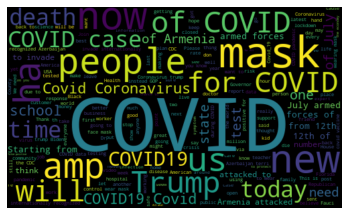

In [15]:
# word cloud visualization
allWords = ' '.join([twts for twts in df_SentimentAnalysis['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

#### "Covid" and "Mask" are the most used words related to covid tweets

In [16]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
    
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
    
df_SentimentAnalysis['Analysis'] = df_SentimentAnalysis['Polarity'].apply(getAnalysis)
# Show the dataframe
    
df_SentimentAnalysis
    
    

,Tweets,Subjectivity,Polarity,Analysis
0,She's gonna need a bigger mask. Walmart COVID ...,0.500000,0.000000,Neutral
1,Great work covering for Heartbreaking stor...,0.750000,1.000000,Positive
2,". In an interview with CNBC, Gates says that f...",0.000000,0.000000,Neutral
3,Oh....my bad....I turned off all media a whil...,0.000000,0.000000,Neutral
4,"As travel restrictions ease, it is important t...",0.750000,0.450000,Positive
...,...,...,...,...
995,"4884482 Starting from 12th of July, armed for...",0.100000,0.000000,Neutral
996,That was the most melodramatic and dishonest ...,0.500000,0.100000,Positive
997,Wish the conservatives in America would take t...,0.333333,-0.166667,Negative
998,Quedarse: A Writer in Mexico During COVID Gets...,1.000000,0.600000,Positive


In [17]:
# Printing positive tweets 

print('Printing positive tweets:\n')
j=1
sortedDF = df_SentimentAnalysis.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+ sortedDF['Tweets'][i])
    print()
    j= j+1
    if(j==5):
        break

Printing positive tweets:

1)   Great work covering for   Heartbreaking story! 🙏 Kudos to Y’all and… 

2) As travel restrictions ease, it is important that we take it upon ourselves to maintain safe communities abroad and… 

3) Turns out Home Alone predicted more than we realized QuarantineLife COVID 

4) I’m in an ember so I’m happy I decided not to drink  and _said. COVID



In [18]:
# Printing negative tweets  

print('Printing negative tweets:\n')
j=1
sortedDF = df_SentimentAnalysis.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1
    if(j==5):
        break

Printing negative tweets:

1)  you all need a drag queen.. I will compete for the money in drag agents these men...
TheChallenge… 

2) I hate you. Wear your mask. covid-19 mask doit ihateyou plus thikktok  

3) Wartime President  behind his resolute desk with a can of beans. Total COVID related deaths in the… 

4) STUPID BITCH. How the hell would you get on if you had to wear a MASK to protect from biological warfare.  Again… 



### Plot the polarity and subjectivity as a scatter plot. It looks like the majority of the tweets are positive, as many of the points are on the right side of the polarity at value 0.00.

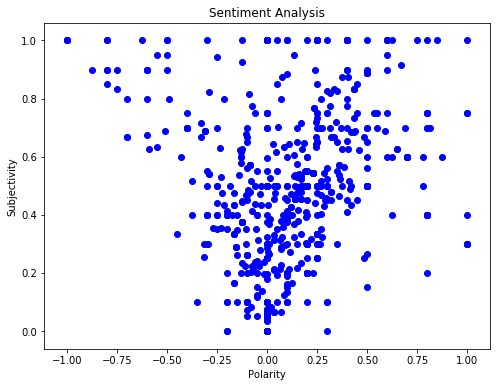

In [19]:
# Plotting 
plt.figure(figsize=(8,6)) 
for i in range(0, df_SentimentAnalysis.shape[0]):
  plt.scatter(df_SentimentAnalysis["Polarity"][i], df_SentimentAnalysis["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

In [20]:
# Print the percentage of positive tweets
ptweets = df_SentimentAnalysis[df_SentimentAnalysis.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

39.8

In [21]:
# Print the percentage of negative tweets
ntweets = df_SentimentAnalysis[df_SentimentAnalysis.Analysis == 'Negative']
ntweets = ntweets['Tweets']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 100, 1)

17.5

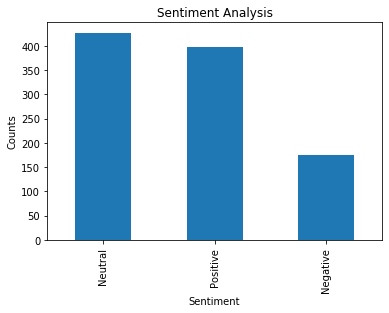

In [23]:
# Plotting and visualizing the counts

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df_SentimentAnalysis['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

In [10]:
###---- I did not edit below this and original dataframe "df" is the same, just addition of "Tweets" column which can be dropped : Priya -----------
df1 = df[['text']]

In [115]:
remove_words = ['covid', 'corona', 'coronavirus', 'pandemic','https', 'stimulus', 'check', 'stimulus checks', 'co', 'http']
pat = r'\b(?:{})\b'.format('|'.join(remove_words))
df1['new'] = df1['text'].str.replace(pat, '')

In [11]:

df1['SID_Sentiment'] = [sid.polarity_scores(tweet)["compound"] for tweet in df1['text']]
df1['TextBlob_Sentiment'] = [TextBlob(tweet).sentiment[0] for tweet in df1['text']]

In [12]:
df1.head()

,text,SID_Sentiment,TextBlob_Sentiment
0,"How does one test positive for #Covid, when th...",0.7345,0.170455
1,Dear enabling media:\n\nWhen Trump acknowledge...,-0.3182,0.250000
2,"Remember, when you’re out for a walk in your l...",0.0000,0.000000
3,#LA rent relief program to begin registration ...,0.4767,0.000000
4,Enjoying one last gym day before they close ag...,0.5267,0.250000


Text(0, 0.5, 'Density')

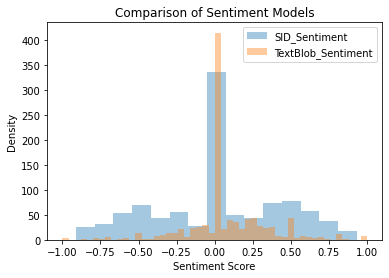

In [118]:
df = df1[df1.SID_Sentiment == 'SID_Sentiment']
sns.distplot(df1['SID_Sentiment'],  kde=False, label='SID_Sentiment')

df =df1[df1.TextBlob_Sentiment == 'TextBlob_Sentiment']
sns.distplot(df1['TextBlob_Sentiment'],  kde=False,label='TextBlob_Sentiment')

plt.legend(prop={'size': 10})
plt.title('Comparison of Sentiment Models')
plt.xlabel('Sentiment Score')
plt.ylabel('Density')

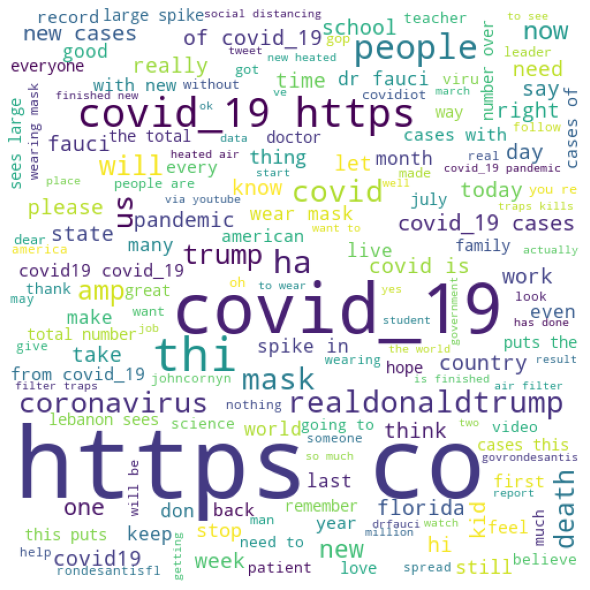

In [119]:
comment_words = ' '
stopwords = set(STOPWORDS) 
  
for w in df1.text: 
      
    w = str(w) 
    tokens = w.split() 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
    for words in tokens: 
        comment_words = comment_words + words + ' '
        
wordcloud = WordCloud(width = 500, height = 500, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
plt.figure(figsize = (8, 8)) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [120]:
import networkx as nx
graph_eng=nx.DiGraph()

# create Nodes
G = nx.Graph()

In [121]:
username = "covid_19"
followers = []
followers.extend(api.followers(screen_name=username))

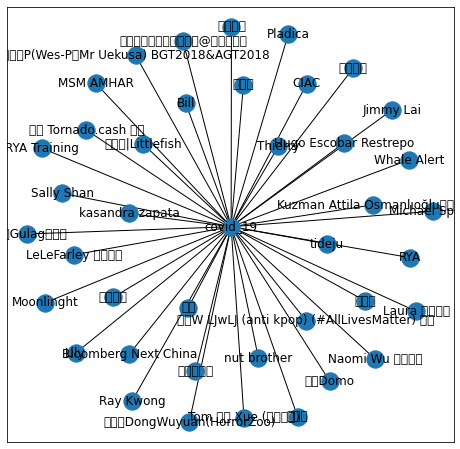

In [122]:
friends = []
friends.extend(api.friends(screen_name=username))

for user in followers:
    G.add_edge(user.name,username)
for user in friends:
    G.add_edge(username,user.name)

plt.figure(figsize=(8,8))
nx.draw_networkx(G)
plt.show()